<a href="https://colab.research.google.com/github/Iamsamiksha/Developers-Community/blob/main/Auto_encode_single_image_to_another_different_image(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os

In [ ]:
SIZE=256

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


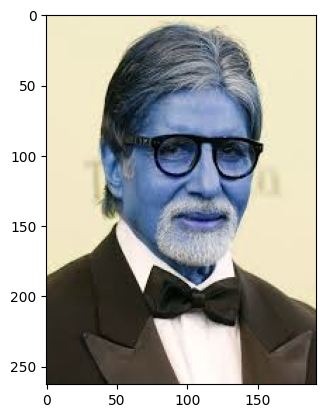

In [ ]:
from tqdm import tqdm
import cv2
from keras.preprocessing.image import img_to_array
from matplotlib.pyplot import imshow

img_data = []
path1 = '/amitabh.jpg'

# Directly read the image instead of trying to list its contents
img = cv2.imread(path1, 1)  # Change 0 to 1 for color images
imshow(img)
img = cv2.resize(img, (SIZE, SIZE))
img_data.append(img_to_array(img))

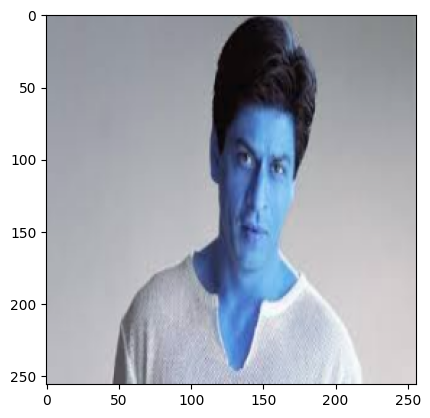

In [ ]:
img2_data=[]
path2 = '/srk.jpg'
# path2 is an image file, not a directory

# Directly read and process the image
img = cv2.imread(path2, 1)  # Change 0 to 1 for color images
imshow(img)
img = cv2.resize(img, (SIZE, SIZE))
imshow(img)
img2_data.append(img_to_array(img))

# Remove the loop and os.listdir call as they are not needed for a single image

In [ ]:
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [ ]:
img_array2 = np.reshape(img2_data, (len(img2_data), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.


In [ ]:
#Original einstein image for prediction as monalisa
#img_data3=[]

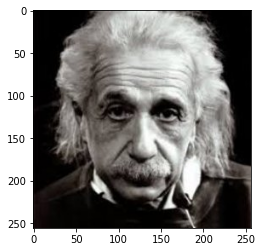

In [ ]:
img3=cv2.imread('/content/drive/MyDrive/KLA/einstein_original.jpg', 1)   #Change 0 to 1 for color images
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
imshow(img3)
img3=cv2.resize(img3,(SIZE, SIZE))
img_data3.append(img_to_array(img3))

In [ ]:
img_array3 = np.reshape(img_data3, (len(img_data3), SIZE, SIZE, 3))
img_array3 = img_array3.astype('float32') / 255.

In [ ]:
import time
start=time.time()

In [ ]:
#encoder
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

In [ ]:
#code(bottleneck)
model.add(MaxPooling2D((2, 2), padding='same'))

In [ ]:
#decoder
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 8)         │           2,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 128, 128, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 256, 256, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 256, 256, 32)        │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 512, 512, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 512, 512, 3)         │             867 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 256, 256, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]

In [36]:
model.fit(img_array, img_array2,
        epochs=1000,
        shuffle=True,
        callbacks=callbacks)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8220 - loss: 0.0033
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8289 - loss: 0.0033
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8161 - loss: 0.0033
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8343 - loss: 0.0033
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8169 - loss: 0.0033
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8351 - loss: 0.0033
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8214 - loss: 0.0032
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8301 - loss: 0.0032
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8301 - loss: 0.0032
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8239 - loss: 0.0032
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8335 - loss: 0.0032
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accura

In [37]:
finish=time.time()
print('total_time = ', finish-start)

total_time =  468.5728783607483


In [38]:
model.save('sachin_autoencoder.keras') # Change the file extension to .keras

In [39]:
print("Output")
pred = model.predict(img_array)

Output
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


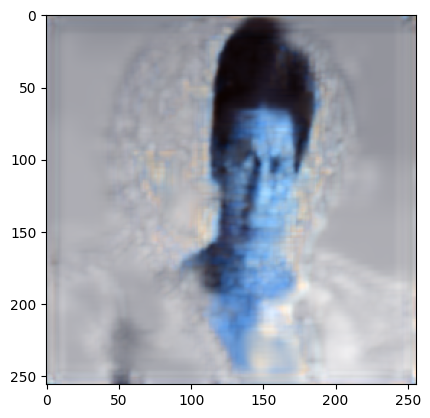

In [40]:
imshow(pred[0].reshape(SIZE,SIZE,3))

In [ ]:
model.fit(img_array, img_array2,
        epochs=1000,
        shuffle=True,
        callbacks=callbacks)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0239 - accuracy: 0.5594
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0237 - accuracy: 0.5604
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0235 - accuracy: 0.5610
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0235 - accuracy: 0.5604
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0235 - accuracy: 0.5593
Epoch 6/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0232 - accuracy: 0.5592
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0232 - accuracy: 0.5586
Epoch 8/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0231 - accuracy: 0.5580
Epoch 9/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0231 - accuracy: 0.5580
Epoch 10/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0230 - accuracy: 0.5576
Epoch 11/1000
1/1 [==========

In [ ]:
finish=time.time()
print('total_time = ', finish-start)

total_time =  3035.2837221622467


In [ ]:
model.save('einstein_autoencoder.model')

INFO:tensorflow:Assets written to: einstein_autoencoder.model/assets


In [ ]:
print("Output")
pred = model.predict(img_array3)

Output


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


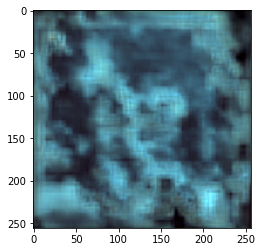

In [ ]:
imshow(pred[0].reshape(SIZE,SIZE,3))